# MODULOS

In [ ]:
#!pip install cartopy

In [1]:
#from google.colab import drive
#drive.mount('/content/drive')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr
from cartopy import crs,feature
from scipy import stats
from sklearn.decomposition import PCA

# PATHS

In [3]:
path_datos = '/content/drive/MyDrive/2025-S1/Monitoria_ada/datos/'
path_datos = '/workspaces/ADA-2025S1/datos/'

# DATOS

In [4]:
sst_data = xr.open_dataset(path_datos + 'sst.mnmean.nc')#https://downloads.psl.noaa.gov/Datasets/noaa.oisst.v2/
sst_mask = xr.open_dataset(path_datos + 'lsmask.nc')
ppt_data = xr.open_dataset(path_datos + 'precip.mon.mean.nc')#!wget -c https://downloads.psl.noaa.gov/Datasets/gpcp/precip.mon.mean.nc

# PCA **DIRECTO**

In [5]:
pacific = sst_data.sel(lon=slice(100,360-70),lat=slice(40,-40))

In [10]:
pacific

<xarray.Dataset> Size: 30MB
Dimensions:    (lat: 80, lon: 190, time: 494, nbnds: 2)
Coordinates:
  * lat        (lat) float32 320B 39.5 38.5 37.5 36.5 ... -37.5 -38.5 -39.5
  * lon        (lon) float32 760B 100.5 101.5 102.5 103.5 ... 287.5 288.5 289.5
  * time       (time) datetime64[ns] 4kB 1981-12-01 1982-01-01 ... 2023-01-01
Dimensions without coordinates: nbnds
Data variables:
    sst        (time, lat, lon) float32 30MB 14.23 14.19 14.15 ... 15.47 16.05
    time_bnds  (time, nbnds) datetime64[ns] 8kB ...
Attributes:
    title:          NOAA Optimum Interpolation (OI) SST V2
    Conventions:    CF-1.0
    history:        Wed Apr  6 13:47:45 2005: ncks -d time,0,278 SAVEs/sst.mn...
    comments:       Data described in  Reynolds, R.W., N.A. Rayner, T.M.\nSmi...
    platform:       Model
    source:         NCEP Climate Modeling Branch
    institution:    National Centers for Environmental Prediction
    References:     https://www.psl.noaa.gov/data/gridded/data.noaa.oisst.v2....
    dataset_title:  NOAA Optimum Interpolation (OI) SST V2
    source_url:     http://www.emc.ncep.noaa.gov/research/cmb/sst_analysis/

In [11]:
pacific_stack = pacific.stack(z=('lat','lon'))

In [12]:
pacific_stack

<xarray.Dataset> Size: 30MB
Dimensions:    (time: 494, z: 15200, nbnds: 2)
Coordinates:
  * time       (time) datetime64[ns] 4kB 1981-12-01 1982-01-01 ... 2023-01-01
  * z          (z) object 122kB MultiIndex
  * lat        (z) float32 61kB 39.5 39.5 39.5 39.5 ... -39.5 -39.5 -39.5 -39.5
  * lon        (z) float32 61kB 100.5 101.5 102.5 103.5 ... 287.5 288.5 289.5
Dimensions without coordinates: nbnds
Data variables:
    sst        (time, z) float32 30MB 14.23 14.19 14.15 ... 15.11 15.47 16.05
    time_bnds  (time, nbnds) datetime64[ns] 8kB ...
Attributes:
    title:          NOAA Optimum Interpolation (OI) SST V2
    Conventions:    CF-1.0
    history:        Wed Apr  6 13:47:45 2005: ncks -d time,0,278 SAVEs/sst.mn...
    comments:       Data described in  Reynolds, R.W., N.A. Rayner, T.M.\nSmi...
    platform:       Model
    source:         NCEP Climate Modeling Branch
    institution:    National Centers for Environmental Prediction
    References:     https://www.psl.noaa.gov/data/gridded/data.noaa.oisst.v2....
    dataset_title:  NOAA Optimum Interpolation (OI) SST V2
    source_url:     http://www.emc.ncep.noaa.gov/research/cmb/sst_analysis/

In [ ]:
pca = PCA(n_components=10)
pca.fit(pacific_stack.sst)

PCA(n_components=10)

In [ ]:
transformed_data = pca.transform(pacific_stack.sst)
transformed_data.shape

(494, 10)

In [ ]:
varianza = pca.explained_variance_ratio_*100

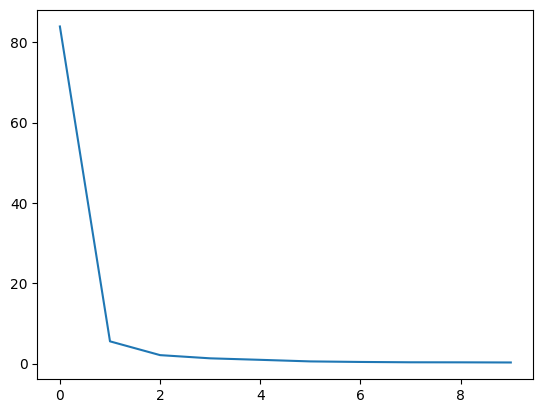

In [ ]:
plt.plot(varianza)

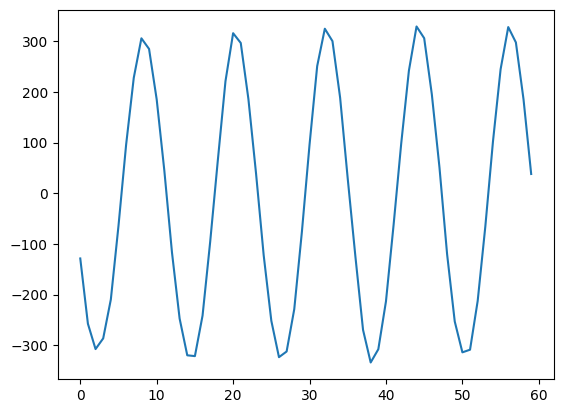

In [ ]:
plt.plot(transformed_data[0:60,0]) #Estamos viendo que lo que captura es el ciclo anual

In [ ]:
pca.components_[0,:].reshape(len(pacific.lat), len(pacific.lon))

array([[ 0.00940728,  0.00948674,  0.00956571, ...,  0.02436691,
         0.02208564,  0.0208151 ],
       [ 0.00948154,  0.00956297,  0.00964376, ...,  0.02070131,
         0.01807776,  0.01693834],
       [ 0.00955479,  0.00963846,  0.00972221, ...,  0.01649573,
         0.01423862,  0.01348245],
       ...,
       [-0.00766858, -0.00753233, -0.0073556 , ..., -0.00599876,
        -0.00674242, -0.00759781],
       [-0.00713117, -0.00701472, -0.00687011, ..., -0.00631178,
        -0.00690483, -0.00767911],
       [-0.00648921, -0.00639347, -0.0062872 , ..., -0.00659677,
        -0.0069581 , -0.00775517]], dtype=float32)

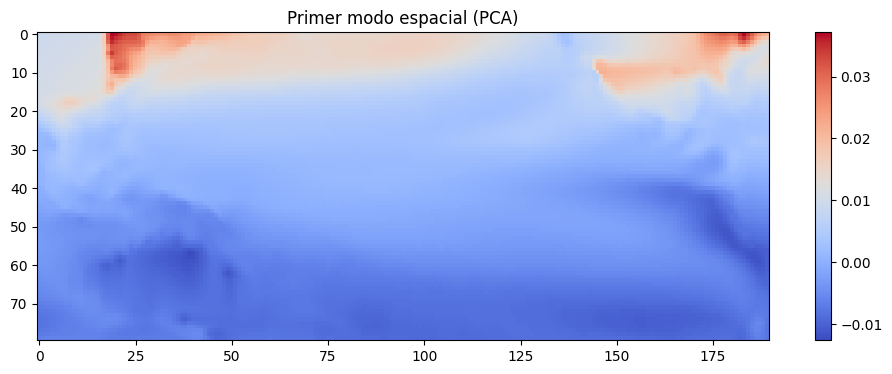

In [ ]:
first_spatial_mode = pca.components_[0,:].reshape(len(pacific.lat), len(pacific.lon))
plt.figure(figsize=(12, 4))
plt.imshow(first_spatial_mode,cmap='coolwarm')
plt.colorbar()
plt.title('Primer modo espacial (PCA)')
plt.show()

# PCA REMOVIENDO CILCO ANUAL

In [ ]:
pacific_sin_cd = pacific.groupby('time.month') - pacific.groupby('time.month').mean('time')
pacific_sin_cd

<xarray.Dataset> Size: 30MB
Dimensions:  (lat: 80, lon: 190, time: 494)
Coordinates:
  * lat      (lat) float32 320B 39.5 38.5 37.5 36.5 ... -36.5 -37.5 -38.5 -39.5
  * lon      (lon) float32 760B 100.5 101.5 102.5 103.5 ... 287.5 288.5 289.5
  * time     (time) datetime64[ns] 4kB 1981-12-01 1982-01-01 ... 2023-01-01
    month    (time) int64 4kB 12 1 2 3 4 5 6 7 8 9 10 ... 4 5 6 7 8 9 10 11 12 1
Data variables:
    sst      (time, lat, lon) float32 30MB 0.02857 0.02262 ... -0.3931 -0.2355

In [ ]:
pacific_sin_cd_stack = pacific_sin_cd.stack(z=('lat','lon'))
pacific_sin_cd_stack

<xarray.Dataset> Size: 30MB
Dimensions:  (time: 494, z: 15200)
Coordinates:
  * time     (time) datetime64[ns] 4kB 1981-12-01 1982-01-01 ... 2023-01-01
    month    (time) int64 4kB 12 1 2 3 4 5 6 7 8 9 10 ... 4 5 6 7 8 9 10 11 12 1
  * z        (z) object 122kB MultiIndex
  * lat      (z) float32 61kB 39.5 39.5 39.5 39.5 ... -39.5 -39.5 -39.5 -39.5
  * lon      (z) float32 61kB 100.5 101.5 102.5 103.5 ... 287.5 288.5 289.5
Data variables:
    sst      (time, z) float32 30MB 0.02857 0.02262 0.01571 ... -0.3931 -0.2355

In [ ]:
pca = PCA(n_components=10)
pca.fit(pacific_sin_cd_stack.sst)

PCA(n_components=10)

In [ ]:
transformed_data_sin_cd = pca.transform(pacific_sin_cd_stack.sst)
transformed_data_sin_cd.shape

(494, 10)

In [ ]:
varianza_sin_cd = pca.explained_variance_ratio_*100

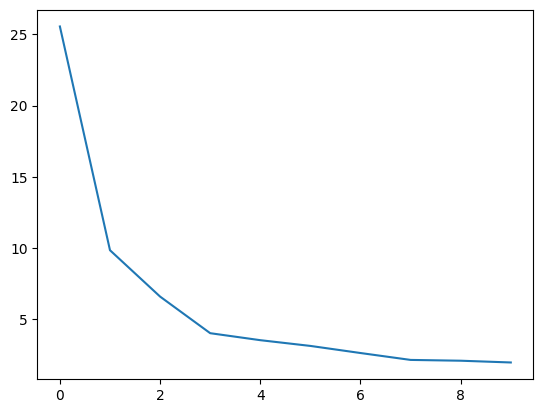

In [ ]:
plt.plot(varianza_sin_cd)

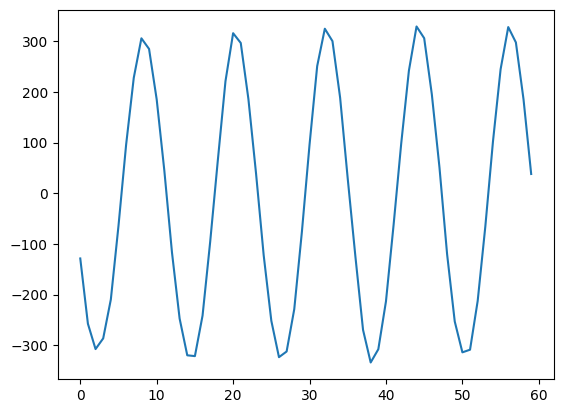

In [ ]:
plt.plot(transformed_data[0:60,0]) # Que estamos viendo?

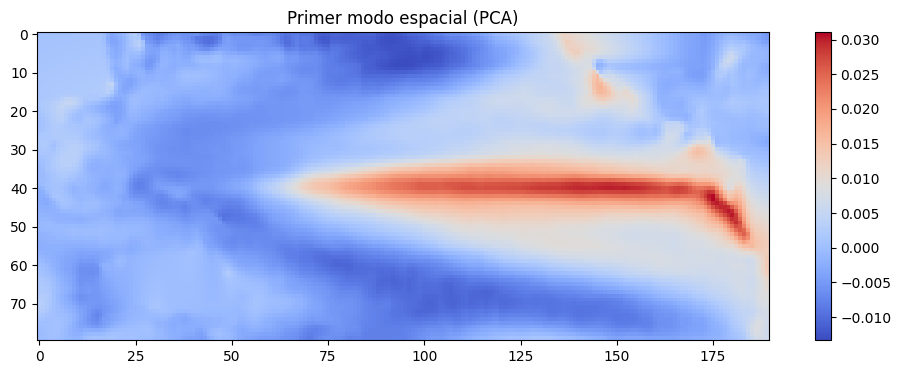

In [ ]:
first_spatial_mode = pca.components_[0,:].reshape(len(pacific.lat), len(pacific.lon))
plt.figure(figsize=(12, 4))
plt.imshow(first_spatial_mode,cmap='coolwarm')
plt.colorbar()
plt.title('Primer modo espacial (PCA)')
plt.show()

# PCA - CON MASCARA

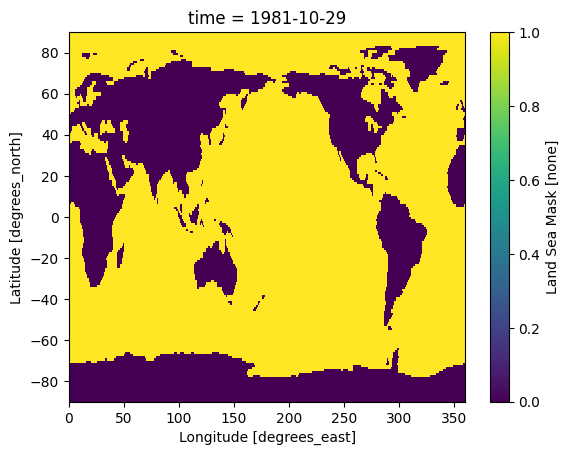

In [ ]:
sst_mask.mask.plot()

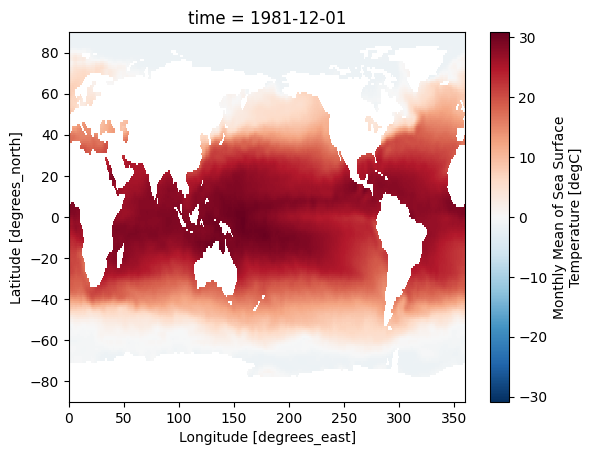

In [ ]:
sst_data_clean = sst_data['sst'].where(sst_mask.isel(time=0).squeeze() == 1)
sst_data_clean.mask.isel(time=0).plot()

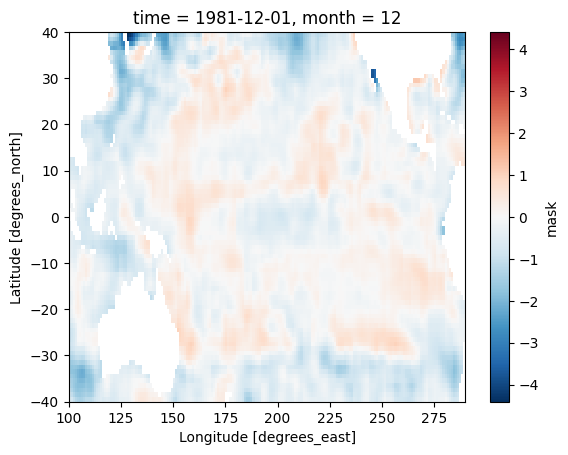

In [ ]:
pacific_clean = sst_data_clean.sel(lon=slice(100,360-70),lat=slice(40,-40))
pacific_clean_sin_cd = pacific_clean.groupby('time.month') - pacific_clean.groupby('time.month').mean('time')
pacific_clean_sin_cd.mask.isel(time=0).plot()

In [ ]:
pacific_clean_sin_cd_stack = pacific_clean_sin_cd.stack(z=('lat','lon')).fillna(0)
pacific_clean_sin_cd_stack

<xarray.Dataset> Size: 30MB
Dimensions:  (time: 494, z: 15200)
Coordinates:
  * time     (time) datetime64[ns] 4kB 1981-12-01 1982-01-01 ... 2023-01-01
    month    (time) int64 4kB 12 1 2 3 4 5 6 7 8 9 10 ... 4 5 6 7 8 9 10 11 12 1
  * z        (z) object 122kB MultiIndex
  * lat      (z) float32 61kB 39.5 39.5 39.5 39.5 ... -39.5 -39.5 -39.5 -39.5
  * lon      (z) float32 61kB 100.5 101.5 102.5 103.5 ... 287.5 288.5 289.5
Data variables:
    mask     (time, z) float32 30MB 0.0 0.0 0.0 0.0 0.0 ... -0.5971 0.0 0.0 0.0

In [ ]:
pca = PCA(n_components=10)
pca.fit(pacific_clean_sin_cd_stack.mask)

PCA(n_components=10)

In [ ]:
transformed_data_clean_sin_cd = pca.transform(pacific_clean_sin_cd_stack.mask)
transformed_data_clean_sin_cd.shape

(494, 10)

In [ ]:
varianza_clean_sin_cd = pca.explained_variance_ratio_*100

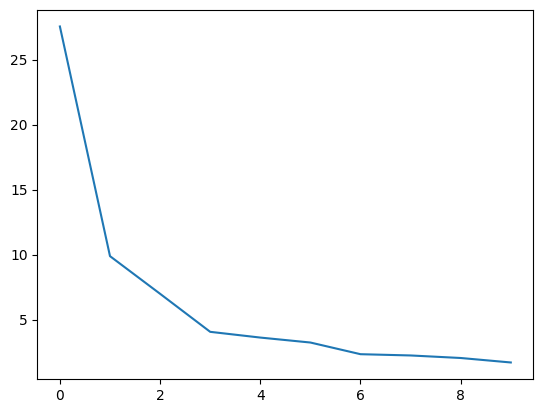

In [ ]:
plt.plot(varianza_clean_sin_cd)

In [ ]:
first_spatial_mode.shape

(80, 190)

In [ ]:
pacific_clean_sin_cd.isel(time=0).mask.isnull()

<xarray.DataArray 'mask' (lat: 80, lon: 190)> Size: 15kB
array([[ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       ...,
       [False, False, False, ...,  True,  True,  True],
       [False, False, False, ...,  True,  True,  True],
       [False, False, False, ...,  True,  True,  True]])
Coordinates:
  * lat      (lat) float32 320B 39.5 38.5 37.5 36.5 ... -36.5 -37.5 -38.5 -39.5
  * lon      (lon) float32 760B 100.5 101.5 102.5 103.5 ... 287.5 288.5 289.5
    time     datetime64[ns] 8B 1981-12-01
    month    int64 8B 12

In [ ]:
first_spatial_mode = pca.components_[0,:].reshape(len(pacific.lat), len(pacific.lon))
first_spatial_mode = np.where(~pacific_clean_sin_cd.isel(time=0).mask.isnull(), first_spatial_mode, np.nan)

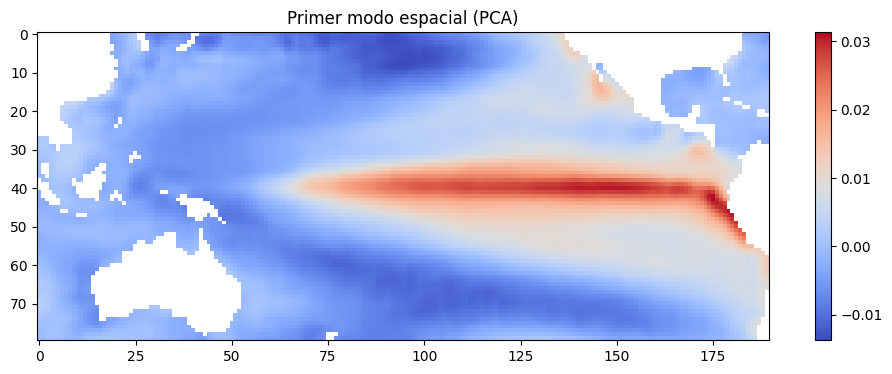

In [ ]:
plt.figure(figsize=(12, 4))
plt.imshow(first_spatial_mode,cmap='coolwarm')
plt.colorbar()
plt.title('Primer modo espacial (PCA)')
plt.show()

# PCA - STT PPT

In [ ]:
pca_2 = PCA(n_components=10)
pca_2.fit(pacific_clean_sin_cd_stack.mask.T)

PCA(n_components=10)

In [ ]:
ppt_data_al = ppt_data.sel(time=slice('1981-12-01','2023-01-01'))

In [ ]:
ppt_data_al_sin_cd = ppt_data_al.groupby('time.month') - ppt_data_al.groupby('time.month').mean('time')

In [ ]:
ppt_data_al_sin_cd_stack = ppt_data_al_sin_cd.stack(z=('lat','lon')).fillna(0)

In [ ]:
transformed_data_clean_sin_cd = pca_2.transform(pacific_clean_sin_cd_stack.mask.T)
transformed_data_clean_sin_cd.shape

(15200, 10)

In [ ]:
ppt_repro = pca_2.transform(ppt_data_al_sin_cd_stack.precip.T)
ppt_repro.shape

(10368, 10)

In [ ]:
first_spatial_mode_ppt = ppt_repro[:,0].reshape(len(ppt_data_al.lat), len(ppt_data_al.lon))
first_spatial_mode_ppt.shape

(72, 144)

/usr/local/lib/python3.11/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.11/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.11/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_boundary_lines_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


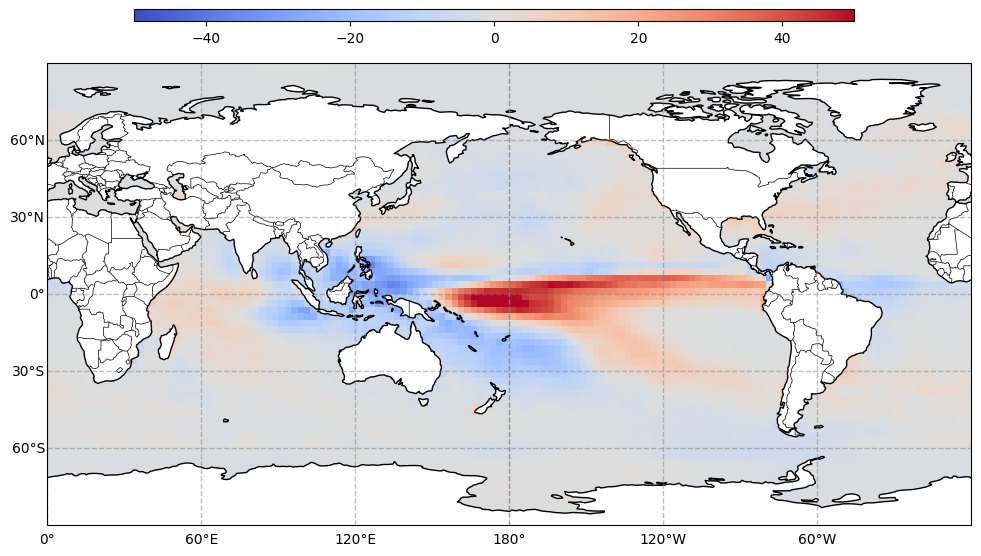

In [ ]:
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111,projection=crs.PlateCarree(central_longitude=180))
cax = fig.add_axes([0.2, 0.95, 0.6, 0.02]) #axis barra de color

gl = ax.gridlines(crs=crs.PlateCarree(), draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False

# Agregar los datos
mesh = ax.pcolormesh(
    ppt_data_al.lon, ppt_data_al.lat,
    first_spatial_mode_ppt,
    cmap='coolwarm',
    vmin=-50, vmax=50,
    transform=crs.PlateCarree())

ax.coastlines()
ax.add_feature(feature.BORDERS, linewidth=0.5)
ax.add_feature(feature.LAND, facecolor='white',zorder=1)
cbar = plt.colorbar(mesh, cax=cax, orientation='horizontal')

In [ ]:
second_spatial_mode_ppt = ppt_repro[:,1].reshape(len(ppt_data_al.lat), len(ppt_data_al.lon))
second_spatial_mode_ppt.shape

(72, 144)

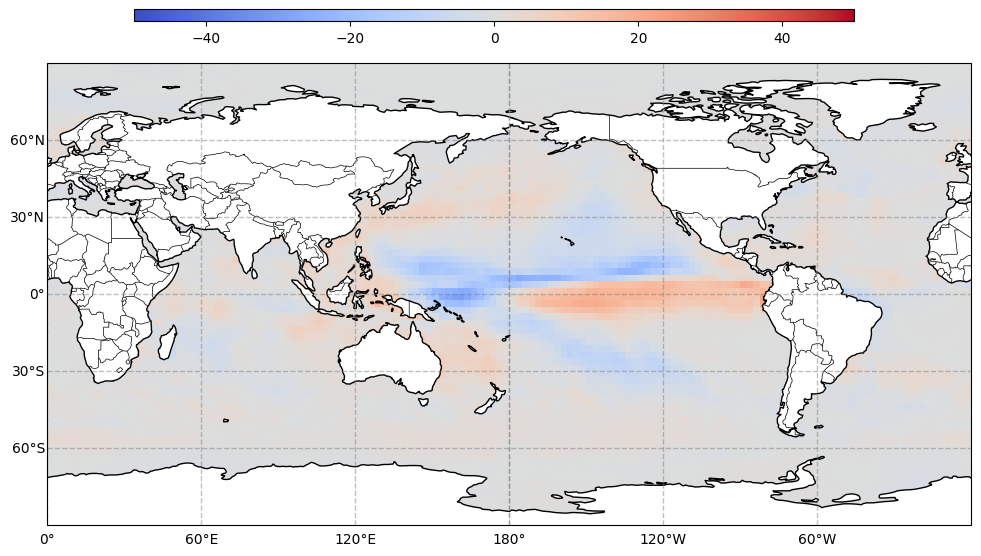

In [ ]:
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111,projection=crs.PlateCarree(central_longitude=180))
cax = fig.add_axes([0.2, 0.95, 0.6, 0.02]) #axis barra de color

gl = ax.gridlines(crs=crs.PlateCarree(), draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False

# Agregar los datos
mesh = ax.pcolormesh(
    ppt_data_al.lon, ppt_data_al.lat,
    second_spatial_mode_ppt,
    cmap='coolwarm',
    vmin=-50, vmax=50,
    transform=crs.PlateCarree())

ax.coastlines()
ax.add_feature(feature.BORDERS, linewidth=0.5)
ax.add_feature(feature.LAND, facecolor='white',zorder=1)
cbar = plt.colorbar(mesh, cax=cax, orientation='horizontal')

In [ ]:
first_spatial_mode = pca.components_[0,:].reshape(len(pacific.lat), len(pacific.lon))
first_spatial_mode = np.where(~pacific_clean_sin_cd.isel(time=0).mask.isnull(), first_spatial_mode, np.nan)

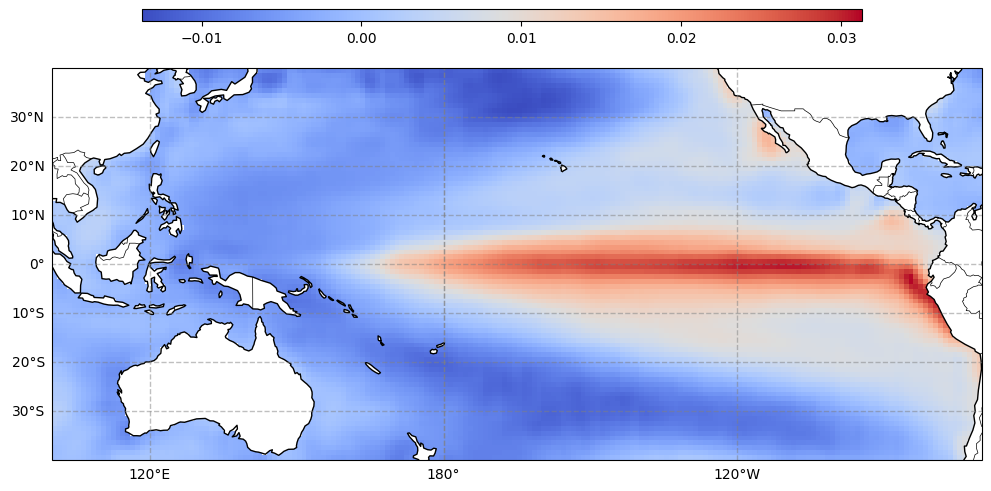

In [ ]:
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111,projection=crs.PlateCarree(central_longitude=180))
cax = fig.add_axes([0.2, 0.9, 0.6, 0.02]) #axis barra de color

gl = ax.gridlines(crs=crs.PlateCarree(), draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False

# Agregar los datos
mesh = ax.pcolormesh(
    pacific.lon, pacific.lat,
    first_spatial_mode,
    cmap='coolwarm',
    #vmin=-50, vmax=50,
    transform=crs.PlateCarree())

ax.coastlines()
ax.add_feature(feature.BORDERS, linewidth=0.5)
ax.add_feature(feature.LAND, facecolor='white',zorder=1)
cbar = plt.colorbar(mesh, cax=cax, orientation='horizontal')